## To Do:

- Be able to handle when there is no height and only a weight (Sort by 19.3)

In [2]:
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import pandas as pd
import numpy as np
import re
import time

In [1]:
def scraper(url):
    # Grab HTML
    browser = Browser('chrome', headless=True)
    browser.visit(url)
    time.sleep(5)
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    
    
    # grab numbers
    ranking = []
    points = []
    rankings = 1
    for x in soup.find_all('div', class_ = 'cell-inner'):
        try: 
            int(x.text)
            if rankings == 1:
                ranking.append(x.text)
                rankings = 0
            else:
                points.append(x.text)
                rankings = 1
        except ValueError:
            continue
            
    
            
    # grab name
    first_name = []
    last_name = []

    for x in soup.find_all('div', class_ = 'full-name'):
        first = x.find('div', class_ = 'first-name').text
        last = x.find('div', class_ = 'last-name').text
        first_name.append(first)
        last_name.append(last)
        
        
    # grab country, age, height, weight
    country = []
    age = []
    height = []
    weight = []

    for x in soup.find_all('ul', class_='info'):
        attributes = x.find_all('li')
        country.append(attributes[0].text)
        age.append(attributes[1].text)
        hw = attributes[2].text.split('|')
        try:
            height.append(hw[0])
        except IndexError:
            height.append('')
        try:
            weight.append(hw[1])
        except:
            weight.append('')
        
    # grab 19.1 score and judge info 
    score_1 = []
    judge_info_1 = []

    for x in soup.find_all(attrs={"data-workout": "1"}):
        if (x.attrs['class'] == ['score']) | (x.attrs['class'] == ['score', 'active-sort']):
            score_1.append(x.find('span', class_ = 'rank').text)
            try: # some do not have judge info
                judge_info_1.append(x.find('div', class_ = 'judge').text)
            except AttributeError:
                judge_info_1.append('')
                
    # grab 19.2 score and judge info 
    score_2 = []
    judge_info_2 = []

    for x in soup.find_all(attrs={"data-workout": "2"}):
        if (x.attrs['class'] == ['score']) | (x.attrs['class'] == ['score', 'active-sort']):
            score_2.append(x.find('span', class_ = 'rank').text)
            try: # some do not have judge info
                judge_info_2.append(x.find('div', class_ = 'judge').text)
            except AttributeError:
                judge_info_2.append('')
                
    # grab 19.3 score and judge info 
    score_3 = []
    judge_info_3 = []

    for x in soup.find_all(attrs={"data-workout": "3"}):
        if (x.attrs['class'] == ['score']) | (x.attrs['class'] == ['score', 'active-sort']):
            score_3.append(x.find('span', class_ = 'rank').text)
            try: # some do not have judge info
                judge_info_3.append(x.find('div', class_ = 'judge').text)
            except AttributeError:
                judge_info_3.append('')
                
    # grab 19.4 score and judge info 
    score_4 = []
    judge_info_4 = []

    for x in soup.find_all(attrs={"data-workout": "4"}):
        if (x.attrs['class'] == ['score']) | (x.attrs['class'] == ['score', 'active-sort']):
            score_4.append(x.find('span', class_ = 'rank').text)
            try: # some do not have judge info
                judge_info_4.append(x.find('div', class_ = 'judge').text)
            except AttributeError:
                judge_info_4.append('')
                
    # grab 19.5 score and judge info 
    score_5 = []
    judge_info_5 = []

    for x in soup.find_all(attrs={"data-workout": "5"}):
        if (x.attrs['class'] == ['score']) | (x.attrs['class'] == ['score', 'active-sort']):
            score_5.append(x.find('span', class_ = 'rank').text)
            try: # some do not have judge info
                judge_info_5.append(x.find('div', class_ = 'judge').text)
            except AttributeError:
                judge_info_5.append('')
                
                
    # Make DataFrame
    df = pd.DataFrame({'Rank': ranking,
                  'First_Name': first_name,
                  'Last_Name': last_name,
                  'Points': points,
                  'Height': height,
                  'Weight': weight,
                  'Age': age,
                  'Country': country,
                  'Score_1': score_1,
                  'Score_2': score_2,
                  'Score_3': score_3,
                  'Score_4': score_4,
                  'Score_5': score_5,
                  'Judge_1': judge_info_1,
                  'Judge_2': judge_info_2,
                  'Judge_3': judge_info_3,
                  'Judge_4': judge_info_4,
                  'Judge_5': judge_info_5})
    
    # Fix Height
    labels = []
    for x in df['Height']:
        try:
            labels.append(x.split(' ')[1])
            if x.split(' ')[1] not in ['cm', 'in']:
                print(f'New Height! {x.split(" ")[1]}')
        except IndexError:
            continue
        
    inches = []
    for x in df['Height']:
        try:
            label = x.split(' ')[1]
            number = x.split(' ')[0]
            if label == 'cm':
                inches.append(np.round(int(number) / 2.54, 0))
            else:
                inches.append(int(number))
        except IndexError:
            inches.append(np.nan)
            
    df['Height_Inches'] = inches
    
    # Fix Weight
    labels = []
    for x in df['Weight']:
        try:
            labels.append(x.split(' ')[2])
            if x.split(' ')[2] not in ['kg', 'lb']:
                print(f'New Weight! {x.split(" ")[2]}')
        except IndexError:
            continue
            
    lbs = []
    for x in df['Weight']:
        try:
            label = x.split(' ')[2]
            number = x.split(' ')[1]
            if label == 'kg':
                lbs.append(np.round(int(number) * 2.205, 0))
            else:
                lbs.append(int(number))
        except IndexError:
            lbs.append(np.nan)

    df['Weight_lbs'] = lbs
    
    ages = []
    for x in df['Age']:
        ages.append(int(x.split(' ')[1]))
    df['Age'] = ages
                        
    # Fix Score
    score = []

    for x in df['Score_1']:
        score.append(re.sub(r'[a-z]+', '', x, re.I))
    df['Score_1'] = score
                        
    score = []

    for x in df['Score_2']:
        score.append(re.sub(r'[a-z]+', '', x, re.I))
    df['Score_2'] = score
                        
    score = []

    for x in df['Score_3']:
        score.append(re.sub(r'[a-z]+', '', x, re.I))
    df['Score_3'] = score
                        
    score = []

    for x in df['Score_4']:
        score.append(re.sub(r'[a-z]+', '', x, re.I))
    df['Score_4'] = score
                        
    score = []

    for x in df['Score_5']:
        score.append(re.sub(r'[a-z]+', '', x, re.I))
    df['Score_5'] = score
                        
    return df
    

In [61]:
url = 'https://games.crossfit.com/leaderboard/open/2019?country_champions=0&division=1&sort=1&scaled=0&page=1'

In [62]:
workout_1 = scraper(url)

In [70]:
url = 'https://games.crossfit.com/leaderboard/open/2019?country_champions=0&division=1&sort=2&scaled=0&page=1'
workout_2 = scraper(url)

In [74]:
url = 'https://games.crossfit.com/leaderboard/open/2019?country_champions=0&division=1&sort=3&scaled=0&page=1'
workout_3 = scraper(url)

New Height! lb
New Height! lb
New Height! lb


In [93]:
url = 'https://games.crossfit.com/leaderboard/open/2019?country_champions=0&division=1&sort=4&scaled=0&page=1'
workout_4 = scraper(url)

In [94]:
url = 'https://games.crossfit.com/leaderboard/open/2019?country_champions=0&division=1&sort=5&scaled=0&page=1'
workout_5 = scraper(url)

In [95]:
workout_5

,Rank,First_Name,Last_Name,Points,Height,Weight,Age,Country,Score_1,Score_2,Score_3,Score_4,Score_5,Judge_1,Judge_2,Judge_3,Judge_4,Judge_5,Height_Inches,Weight_lbs
0,1,Mathew,Fraser,66,67 in,195 lb,29,United States,59,3,1,2,1,Judged by Shane Orr at CrossFit Mayhem.,Judged by Matthew OKeefe at CrossFit Columbus.,Judged by angelo dicicco at CrossFit Mayhem.,,Judged by Daniel Lopez at CrossFit HQ.,67.0,195.0
1,103,Mauro,Acevedo,1381,1 cm,80 kg,29,Argentina,1054,129,107,89,2,Judged by Magali Acevedo Calvete at CrossFit A...,Judged by Magali Acevedo Calvete at CrossFit A...,Judged by Magali Acevedo Calvete at CrossFit A...,Judged by Magali Acevedo Calvete at CrossFit A...,Judged by Magali Acevedo Calvete at CrossFit A...,0.0,176.0
2,4,Lefteris,Theofanidis,183,171 cm,81 kg,29,Greece,51,5,115,9,3,,,,,,67.0,179.0
3,3,Jacob,Heppner,168,68 in,192 lb,29,United States,136,20,3,5,4,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,68.0,192.0
4,403,Colten,Mertens,4520,64 in,185 lb,21,United States,4068,94,319,34,5,Judged by Armand McCormick at CrossFit Kilo.,Judged by Armand McCormick at CrossFit Kilo.,Judged by Armand McCormick at CrossFit Kilo.,Judged by Armand McCormick at CrossFit Kilo.,Judged by Armand McCormick at CrossFit Kilo.,64.0,185.0
5,23,Eric,Carmody,435,71 in,200 lb,31,United States,30,11,348,40,6,Judged by Santino Marini at CrossFit Invictus.,Judged by Sandra Oplinger at CrossFit Invictus.,Judged by Santino Marini at CrossFit Invictus.,Judged by Sandra Oplinger at CrossFit Invictus.,Judged by Sandra Oplinger at CrossFit Invictus.,71.0,200.0
6,200,Scott,Tetlow,2338,63 in,172 lb,26,United States,2056,154,79,42,7,Judged by Jorge Campos at La Playa CrossFit.,Judged by Pablo Manosalva at La Playa CrossFit.,Judged by Pablo Manosalva at La Playa CrossFit.,Judged by Jorge Campos at La Playa CrossFit.,Judged by Jorge Campos at La Playa CrossFit.,63.0,172.0
7,701,Milosz,Staworzynski,7466,179 cm,88 kg,31,Poland,59,575,23,6801,8,,,Judged by Rafal Wojdat at CrossFit Ursynow.,,,70.0,194.0
8,38,Jake,Berman,613,68 in,183 lb,23,United States,219,340,24,21,9,Judged by David Flynn at CrossFit Perimeter.,Judged by David Flynn at CrossFit Perimeter.,Judged by David Flynn at CrossFit Perimeter.,Judged by David Flynn at CrossFit Perimeter.,Judged by David Flynn at CrossFit Perimeter.,68.0,183.0
9,7,Uldis,Upenieks,246,174 cm,84 kg,21,Latvia,59,55,107,16,9,Judged by Stepan Stafik at CrossFit Riga.,Judged by Jose Manuel Jordan at CrossFit Riga.,Judged by Jose Manuel Jordan at CrossFit Riga.,Judged by Jose Manuel Jordan at CrossFit Riga.,Judged by Jose Manuel Jordan at CrossFit Riga.,69.0,185.0


In [104]:
workout_4.dtypes

Rank              object
First_Name        object
Last_Name         object
Points            object
Height            object
Weight            object
Age                int64
Country           object
Score_1           object
Score_2           object
Score_3           object
Score_4           object
Score_5           object
Judge_1           object
Judge_2           object
Judge_3           object
Judge_4           object
Judge_5           object
Height_Inches    float64
Weight_lbs       float64
dtype: object

In [3]:
def clean_dataframe(my_df):
    my_df['Rank'] = my_df['Rank'].astype(int)
    my_df['Score_1'] = my_df['Score_1'].astype(int)
    my_df['Score_2'] = my_df['Score_2'].astype(int)
    my_df['Score_3'] = my_df['Score_3'].astype(int)
    my_df['Score_4'] = my_df['Score_4'].astype(int)
    my_df['Score_5'] = my_df['Score_5'].astype(int)
    return my_df

In [107]:
workout_1 = clean_dataframe(workout_1)

In [110]:
workout_2 = clean_dataframe(workout_2)

In [112]:
workout_3 = clean_dataframe(workout_3)

In [114]:
workout_4 = clean_dataframe(workout_4)

In [116]:
workout_5 = clean_dataframe(workout_5)

In [119]:
df1 = clean_dataframe(df1)

In [120]:
df1.corr()

,Rank,Age,Score_1,Score_2,Score_3,Score_4,Score_5,Height_Inches,Weight_lbs
Rank,1.000000,-0.140884,0.575164,0.550758,0.278268,0.118345,0.306431,-0.029063,-0.118916
Age,-0.140884,1.000000,-0.035879,-0.389459,0.183705,0.038511,-0.225748,-0.006228,0.185949
Score_1,0.575164,-0.035879,1.000000,0.114352,-0.111836,-0.487452,-0.064870,-0.468796,-0.408349
Score_2,0.550758,-0.389459,0.114352,1.000000,-0.204383,0.193445,0.181569,0.004273,-0.077005
Score_3,0.278268,0.183705,-0.111836,-0.204383,1.000000,-0.026224,-0.148351,0.134887,0.112129
Score_4,0.118345,0.038511,-0.487452,0.193445,-0.026224,1.000000,0.142604,0.552358,0.455252
Score_5,0.306431,-0.225748,-0.064870,0.181569,-0.148351,0.142604,1.000000,0.245661,0.026849
Height_Inches,-0.029063,-0.006228,-0.468796,0.004273,0.134887,0.552358,0.245661,1.000000,0.670220
Weight_lbs,-0.118916,0.185949,-0.408349,-0.077005,0.112129,0.455252,0.026849,0.670220,1.000000


In [151]:
workout_1['Height_Inches'].mean()

72.14285714285714

In [152]:
workout_2['Height_Inches'].mean()

69.78

In [153]:
workout_3['Height_Inches'].mean()

69.06666666666666

In [154]:
workout_4['Height_Inches'].mean()

67.80434782608695

In [155]:
workout_5['Height_Inches'].mean()

68.4375

In [156]:
workout_1['Weight_lbs'].mean()

205.70833333333334

In [157]:
workout_2['Weight_lbs'].mean()

196.62

In [158]:
workout_3['Weight_lbs'].mean()

185.39583333333334

In [159]:
workout_4['Weight_lbs'].mean()

182.60416666666666

In [160]:
workout_5['Weight_lbs'].mean()

187.75510204081633

In [166]:
df1['Height_Inches'].mean()

69.58

In [168]:
df1['Weight_lbs'].mean()

193.14

In [182]:
heights = [workout_1['Height_Inches'].mean(), workout_2['Height_Inches'].mean(), workout_3['Height_Inches'].mean(),
          workout_4['Height_Inches'].mean(), workout_5['Height_Inches'].mean(), df1['Height_Inches'].mean()]

In [183]:
weights = [workout_1['Weight_lbs'].mean(), workout_2['Weight_lbs'].mean(), workout_3['Weight_lbs'].mean(),
          workout_4['Weight_lbs'].mean(), workout_5['Weight_lbs'].mean()]

In [184]:
labels = ['19.1', '19.2', '19.3', '19.4', '19.5', 'Overall']
x_pos = [i for i, _ in enumerate(labels)]

In [185]:
x_pos

[0, 1, 2, 3, 4, 5]

In [186]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.xkcd()

In [187]:
heights

[72.14285714285714,
 69.78,
 69.06666666666666,
 67.80434782608695,
 68.4375,
 69.58]

In [5]:
plt.figure(figsize = (12, 8))
plt.bar(x_pos, heights, color = '#57a71c')
plt.xticks(x_pos, labels, fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Height in Inches', fontsize = 18)
plt.xlabel('Open Event and Overall Leaders', fontsize = 18)
plt.ylim(64, 74)
plt.axhline(73, color = 'k', linestyle = '--')
plt.text(3, 73.2, 'My Height = 73"')
plt.text(-.2, 72.2, '72.1"')
plt.text(.8, 69.9, '69.8"')
plt.text(1.8, 69.1, '69.0"')
plt.text(2.8, 67.9, '67.8"')
plt.text(3.8, 68.5, '68.5"')
plt.text(4.8, 69.64, '69.6"')
plt.title('Average Height of Top 50 CF Open Athletes by Workout and Overall')

NameError: name 'plt' is not defined

In [4]:
url = 'https://games.crossfit.com/leaderboard/open/2019?view=0&division=1&scaled=0&sort=0'

In [5]:
url2 = 'https://games.crossfit.com/leaderboard/open/2019?view=0&division=1&scaled=0&sort=0&page=2'

In [6]:
page1 = scraper(url)
page2 = scraper(url2)

In [7]:
page3 = scraper('https://games.crossfit.com/leaderboard/open/2019?view=0&division=1&scaled=0&sort=0&page=3')
page4 = scraper('https://games.crossfit.com/leaderboard/open/2019?view=0&division=1&scaled=0&sort=0&page=4')
page5 = scraper('https://games.crossfit.com/leaderboard/open/2019?view=0&division=1&scaled=0&sort=0&page=5')
page6 = scraper('https://games.crossfit.com/leaderboard/open/2019?view=0&division=1&scaled=0&sort=0&page=6')
page7 = scraper('https://games.crossfit.com/leaderboard/open/2019?view=0&division=1&scaled=0&sort=0&page=7')
page8 = scraper('https://games.crossfit.com/leaderboard/open/2019?view=0&division=1&scaled=0&sort=0&page=8')
page9 = scraper('https://games.crossfit.com/leaderboard/open/2019?view=0&division=1&scaled=0&sort=0&page=9')
page10 = scraper('https://games.crossfit.com/leaderboard/open/2019?view=0&division=1&scaled=0&sort=0&page=10')

New Height! lb
New Height! lb
New Height! kg
New Height! kg
New Height! lb
New Height! lb
New Height! kg
New Height! lb
New Height! kg
New Height! lb


In [8]:
df = pd.concat([page1, page2, page3, page4, page5, page6, page7, page8, page9, page10])

In [9]:
df.shape

(500, 20)

In [10]:
df.isnull().sum()

Rank              0
First_Name        0
Last_Name         0
Points            0
Height            0
Weight            0
Age               0
Country           0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
Score_5           0
Judge_1           0
Judge_2           0
Judge_3           0
Judge_4           0
Judge_5           0
Height_Inches    22
Weight_lbs       35
dtype: int64

In [11]:
df.head()

,Rank,First_Name,Last_Name,Points,Height,Weight,Age,Country,Score_1,Score_2,Score_3,Score_4,Score_5,Judge_1,Judge_2,Judge_3,Judge_4,Judge_5,Height_Inches,Weight_lbs
0,1,Mathew,Fraser,66,67 in,195 lb,29,United States,59,3,1,2,1,Judged by Shane Orr at CrossFit Mayhem.,Judged by Matthew OKeefe at CrossFit Columbus.,Judged by angelo dicicco at CrossFit Mayhem.,,Judged by Daniel Lopez at CrossFit HQ.,67.0,195.0
1,2,Björgvin Karl,Guðmundsson,93,178 cm,185 lb,26,Iceland,5,21,32,21,14,Judged by Hafsteinn Gunnlaugssson at Reebok Cr...,Judged by Evert Viglundsson at CrossFit Reykja...,Judged by Hafsteinn Gunnlaugsson at CrossFit R...,Judged by Throstur Olason at CrossFit Reykjavík.,Judged by Hafsteinn Gunnlaugsson at CrossFit R...,70.0,185.0
2,3,Jacob,Heppner,168,68 in,192 lb,29,United States,136,20,3,5,4,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,68.0,192.0
3,4,Lefteris,Theofanidis,183,171 cm,81 kg,29,Greece,51,5,115,9,3,,,,,,67.0,179.0
4,5,Jean-Simon,Roy-Lemaire,187,176 cm,195 lb,25,Canada,5,29,6,119,28,Judged by Mathieu Gravel at Tonic CrossFit.,Judged by Mathieu Gravel at Tonic CrossFit.,Judged by Mathieu Gravel at Tonic CrossFit.,Judged by Mathieu Gravel at Tonic CrossFit.,Judged by Mathieu Gravel at Tonic CrossFit.,69.0,195.0


In [14]:
df.dtypes

Rank              object
First_Name        object
Last_Name         object
Points            object
Height            object
Weight            object
Age                int64
Country           object
Score_1           object
Score_2           object
Score_3           object
Score_4           object
Score_5           object
Judge_1           object
Judge_2           object
Judge_3           object
Judge_4           object
Judge_5           object
Height_Inches    float64
Weight_lbs       float64
dtype: object

In [12]:
df = clean_dataframe(df)

In [13]:
df['Points'] = df['Points'].astype(int)

In [14]:
df[['Rank', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5']].corr()

,Rank,Score_1,Score_2,Score_3,Score_4,Score_5
Rank,1.000000,0.519552,0.537588,0.549244,0.544248,0.550470
Score_1,0.519552,1.000000,0.168024,-0.069201,-0.061947,0.030447
Score_2,0.537588,0.168024,1.000000,0.054777,0.166713,0.223858
Score_3,0.549244,-0.069201,0.054777,1.000000,0.260838,0.139976
Score_4,0.544248,-0.061947,0.166713,0.260838,1.000000,0.386050
Score_5,0.550470,0.030447,0.223858,0.139976,0.386050,1.000000


In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.xkcd();

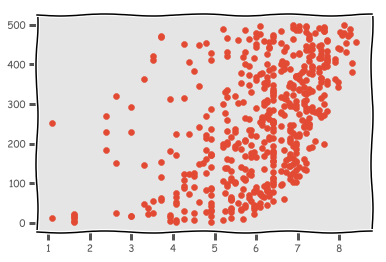

In [43]:
plt.scatter(df['log_1'], df['Rank'])

Text(0.5,0,'19.5 Finish')

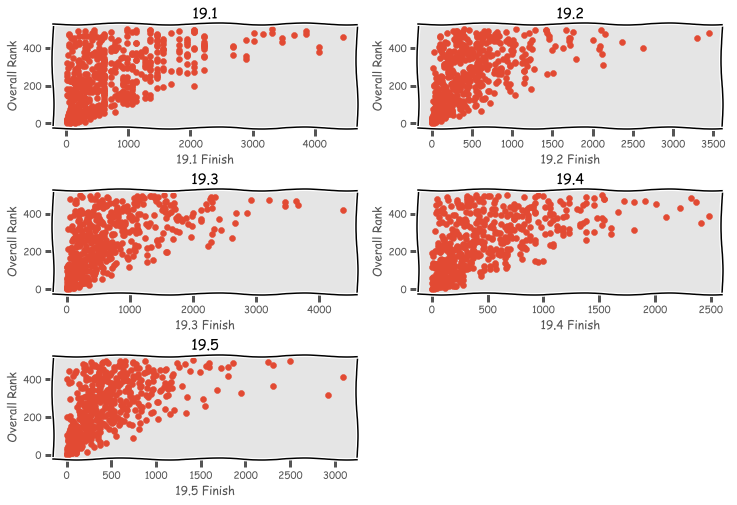

In [61]:
fig = plt.figure(figsize = (12, 8))
plt.subplots_adjust(hspace = .6)

ax1 = plt.subplot(321)
ax1.scatter(df['Score_1'], df['Rank'])
ax1.set_title('19.1')
ax1.set_ylabel('Overall Rank')
ax1.set_xlabel('19.1 Finish')

ax2 = plt.subplot(322)
ax2.scatter(df['Score_2'], df['Rank'])
ax2.set_title('19.2')
ax2.set_ylabel('Overall Rank')
ax2.set_xlabel('19.2 Finish')

ax3 = plt.subplot(323)
ax3.scatter(df['Score_3'], df['Rank'])
ax3.set_title('19.3')
ax3.set_ylabel('Overall Rank')
ax3.set_xlabel('19.3 Finish')

ax4 = plt.subplot(324)
ax4.scatter(df['Score_4'], df['Rank'])
ax4.set_title('19.4')
ax4.set_ylabel('Overall Rank')
ax4.set_xlabel('19.4 Finish')

ax5 = plt.subplot(325)
ax5.scatter(df['Score_5'], df['Rank'])
ax5.set_title('19.5')
ax5.set_ylabel('Overall Rank')
ax5.set_xlabel('19.5 Finish')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df_corr = df[['Rank', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5']]
df_corr.columns = ['Overall', '19.1', '19.2', '19.3', '19.4', '19.5']
df_corr = df_corr.corr()

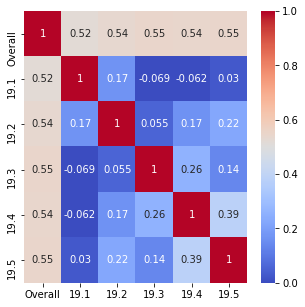

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(df_corr,
            vmin=0,
            cmap='coolwarm',
            annot=True);

In [25]:
df_corr

,Overall,19.1,19.2,19.3,19.4,19.5
Overall,1.000000,0.519552,0.537588,0.549244,0.544248,0.550470
19.1,0.519552,1.000000,0.168024,-0.069201,-0.061947,0.030447
19.2,0.537588,0.168024,1.000000,0.054777,0.166713,0.223858
19.3,0.549244,-0.069201,0.054777,1.000000,0.260838,0.139976
19.4,0.544248,-0.061947,0.166713,0.260838,1.000000,0.386050
19.5,0.550470,0.030447,0.223858,0.139976,0.386050,1.000000


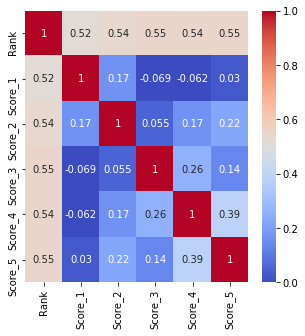

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(df[['Rank', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5']].corr(),
            vmin=0,
            cmap='coolwarm',
            annot=True);

In [30]:
df_corr.columns

Index(['Overall', '19.1', '19.2', '19.3', '19.4', '19.5'], dtype='object')

In [33]:
df_corr.drop('Overall', inplace = True)

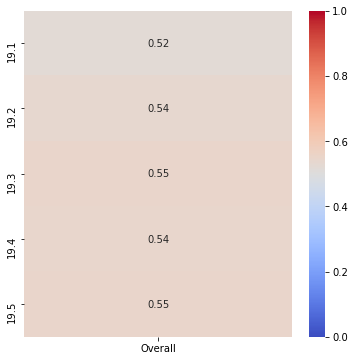

In [39]:
plt.figure(figsize=(6,6))
sns.heatmap(df_corr[['Overall']],
            vmin=0,
            vmax=1,
            cmap='coolwarm',
            annot=True);

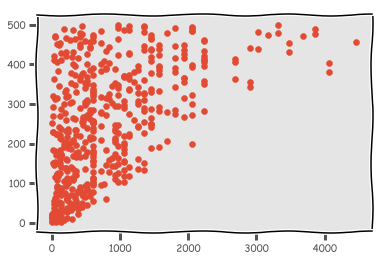

In [19]:
plt.scatter(df['Score_1'], df['Rank'])

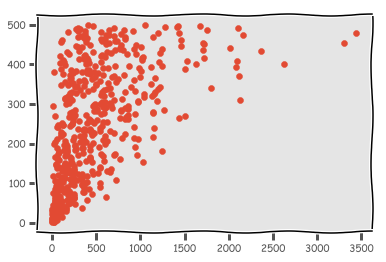

In [20]:
plt.scatter(df['Score_2'], df['Rank'])

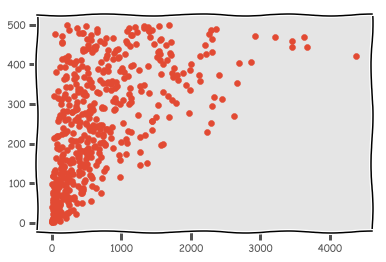

In [21]:
plt.scatter(df['Score_3'], df['Rank'])

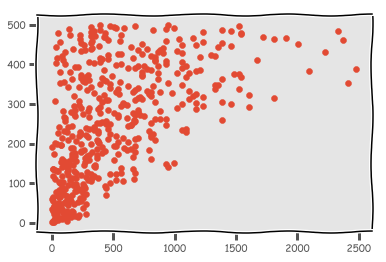

In [22]:
plt.scatter(df['Score_4'], df['Rank'])

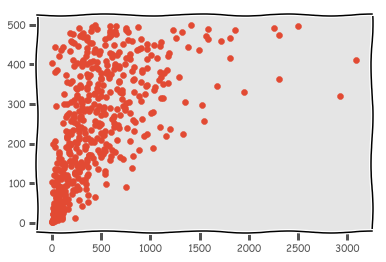

In [23]:
plt.scatter(df['Score_5'], df['Rank'])

(array([  2.,   2.,   8.,  13.,  29.,  54., 102., 156., 115.,  19.]),
 array([0.        , 0.803722  , 1.60744401, 2.41116601, 3.21488801,
        4.01861002, 4.82233202, 5.62605402, 6.42977602, 7.23349803,
        8.03722003]),
 <a list of 10 Patch objects>)

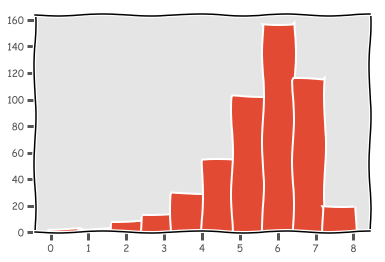

In [24]:
plt.hist(np.log(df['Score_5']))

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [26]:
formula = "Rank ~ Score_1+Score_2+Score_3+Score_4+Score_5"
model = ols(formula= formula, data=df).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.783e+04
Date:                Sat, 24 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:05:42   Log-Likelihood:                -1562.2
No. Observations:                 500   AIC:                             3136.
Df Residuals:                     494   BIC:                             3162.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.5185      0.534    -45.951      0.000     -25.567     -23.470
Score_1        0.0946      0.000    289.639      0.000       0.094       0.095
Score_2        0.0945      0.001    174.967      0.000       0.093       0.096
Score_3        0.0952      0.000    252.463      0.000       0.094       0.096
Score_4        0.0935      0.001    153.301      0.000       0.092       0.095
Score_5        0.0945      0.001    152.184      0.000       0.093       0.096
==============================================================================
Omnibus:                        8.093   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.206
Skew:                          -0.314   Prob(JB):                       0.0165
Kurtosis:                       2.995   Cond. No.                     3.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
df['19.1'] = np.log(df['Score_1'])
df['19.2'] = np.log(df['Score_2'])
df['19.3'] = np.log(df['Score_3'])
df['19.4'] = np.log(df['Score_4'])
df['19.5'] = np.log(df['Score_5'])

In [64]:
formula = "Rank ~ '19.1'+'19.2'+'19.3'+'19.4'+'19.5'"
model = ols(formula= formula, data=df).fit()

PatsyError: Number of rows mismatch between data argument and '19.1' (500 versus 1)
    Rank ~ '19.1'+'19.2'+'19.3'+'19.4'+'19.5'
           ^^^^^^

In [61]:
model.summary()

NameError: name 'model' is not defined

In [31]:
df[['Rank', 'log_1', 'log_2', 'log_3', 'log_4', 'log_5']].corr()

,Rank,log_1,log_2,log_3,log_4,log_5
Rank,1.000000,0.501435,0.628482,0.626158,0.584725,0.638560
log_1,0.501435,1.000000,0.369604,0.147392,0.084294,0.233393
log_2,0.628482,0.369604,1.000000,0.373853,0.437710,0.543304
log_3,0.626158,0.147392,0.373853,1.000000,0.522744,0.439610
log_4,0.584725,0.084294,0.437710,0.522744,1.000000,0.648407
log_5,0.638560,0.233393,0.543304,0.439610,0.648407,1.000000


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [44]:
train_X, test_X, train_y, test_y = train_test_split(df[['Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5']]
                                                      , df['Rank'], random_state=1)
my_model = RandomForestRegressor(random_state=0).fit(train_X, train_y)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
np.array([59, 3, 1, 2, 1]).reshape(1, -1)

array([[59,  3,  1,  2,  1]])

In [50]:
my_model.predict(np.array([59, 3, 1, 2, 1]).reshape(1, -1))

array([4.])

In [56]:
pred = my_model.predict(test_X)

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
mean_absolute_error(pred, test_y)

39.554399999999994

In [ ]:
my_model.score()

In [84]:
my_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [89]:
perm = PermutationImportance(my_model, random_state=1).fit(test_X, test_y)
eli5.show_weights(perm, feature_names = ['19.1', '19.2', '19.3', '19.4', '19.5'])

Weight,Feature
0.3540 ± 0.0257,19.3
0.3259 ± 0.0738,19.1
0.2503 ± 0.0760,19.5
0.1356 ± 0.0420,19.2
0.0623 ± 0.0398,19.4


In [86]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(test_X, test_y)
eli5.show_weights(perm, feature_names = test_X.columns.tolist())

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Weight,Feature
0.3540 ± 0.0257,Score_3
0.3259 ± 0.0738,Score_1
0.2503 ± 0.0760,Score_5
0.1356 ± 0.0420,Score_2
0.0623 ± 0.0398,Score_4


In [40]:
df.head()

,Rank,First_Name,Last_Name,Points,Height,Weight,Age,Country,Score_1,Score_2,Score_3,Score_4,Score_5,Judge_1,Judge_2,Judge_3,Judge_4,Judge_5,Height_Inches,Weight_lbs
0,1,Mathew,Fraser,66,67 in,195 lb,29,United States,59,3,1,2,1,Judged by Shane Orr at CrossFit Mayhem.,Judged by Matthew OKeefe at CrossFit Columbus.,Judged by angelo dicicco at CrossFit Mayhem.,,Judged by Daniel Lopez at CrossFit HQ.,67.0,195.0
1,2,Björgvin Karl,Guðmundsson,93,178 cm,185 lb,26,Iceland,5,21,32,21,14,Judged by Hafsteinn Gunnlaugssson at Reebok Cr...,Judged by Evert Viglundsson at CrossFit Reykja...,Judged by Hafsteinn Gunnlaugsson at CrossFit R...,Judged by Throstur Olason at CrossFit Reykjavík.,Judged by Hafsteinn Gunnlaugsson at CrossFit R...,70.0,185.0
2,3,Jacob,Heppner,168,68 in,192 lb,29,United States,136,20,3,5,4,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,Judged by Andrew Kuechler at Cobra Command Cro...,68.0,192.0
3,4,Lefteris,Theofanidis,183,171 cm,81 kg,29,Greece,51,5,115,9,3,,,,,,67.0,179.0
4,5,Jean-Simon,Roy-Lemaire,187,176 cm,195 lb,25,Canada,5,29,6,119,28,Judged by Mathieu Gravel at Tonic CrossFit.,Judged by Mathieu Gravel at Tonic CrossFit.,Judged by Mathieu Gravel at Tonic CrossFit.,Judged by Mathieu Gravel at Tonic CrossFit.,Judged by Mathieu Gravel at Tonic CrossFit.,69.0,195.0


In [41]:
df.to_csv('crossfit_open.csv', index = False)

There are n people lined up, and each have a height represented as an integer. A murder has happened right in front of them, and only people who are taller than everyone in front of them are able to see what has happened. How many witnesses are there?

Example:
Input: [3, 6, 3, 4, 1]  
Output: 3
Explanation: Only [6, 4, 1] were able to see in front of them.

In [77]:
my_list = [3, 6, 3, 4,1]

In [78]:
max(my_list)

6

In [82]:
my_list[1:]

[6, 3, 4, 1]

In [81]:
my_list.index(max(my_list))

1

In [83]:
my_list[my_list.index(max(my_list)):]

[6, 3, 4, 1]

In [76]:
def witnesses(heights):
  # Fill this in.
    top_num = None
    tall_people = []
    for counts, i in enumerate(reversed(heights)):
        if counts == 0:
            top_num = i
            tall_people.append(i)
        else:
            if i > top_num:
                top_num = i
                tall_people.append(i)
    return len(tall_people)

print (witnesses([3, 6, 3, 4, 1]))
# 3

3
